In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Загрузка данных
data = pd.read_excel("yahoo_data_1.xlsx")
data.columns = ["Open", "High", "Low", "Close", "Adj_Close", "Volume"]

In [10]:
# Преобразование данных (замена запятых и приведение к числовому типу)
data = data.replace({",": ""}, regex=True).astype(float)

# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

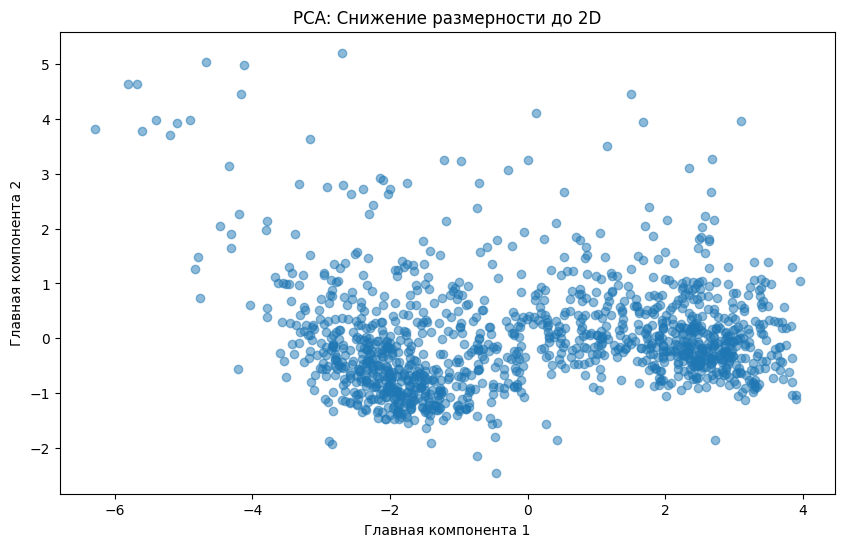

In [4]:
# Применяем PCA для снижения размерности до 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Визуализация результата PCA
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.title("PCA: Снижение размерности до 2D")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()

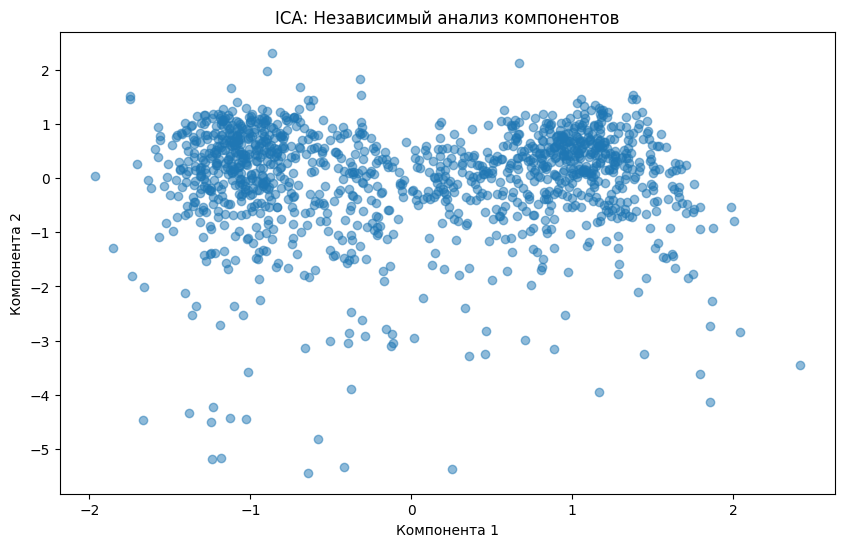

In [5]:
# Применение ICA для выделения независимых компонентов
ica = FastICA(n_components=2)
data_ica = ica.fit_transform(data_scaled)

# Визуализация результата ICA
plt.figure(figsize=(10, 6))
plt.scatter(data_ica[:, 0], data_ica[:, 1], alpha=0.5)
plt.title("ICA: Независимый анализ компонентов")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()

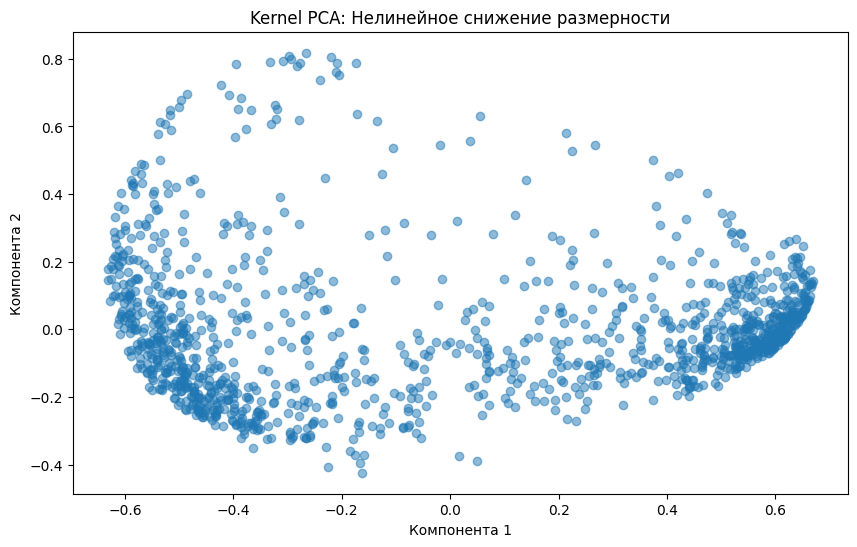

In [6]:
# Применение Kernel PCA для нелинейного снижения размерности
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
data_kpca = kernel_pca.fit_transform(data_scaled)

# Визуализация результата Kernel PCA
plt.figure(figsize=(10, 6))
plt.scatter(data_kpca[:, 0], data_kpca[:, 1], alpha=0.5)
plt.title("Kernel PCA: Нелинейное снижение размерности")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()

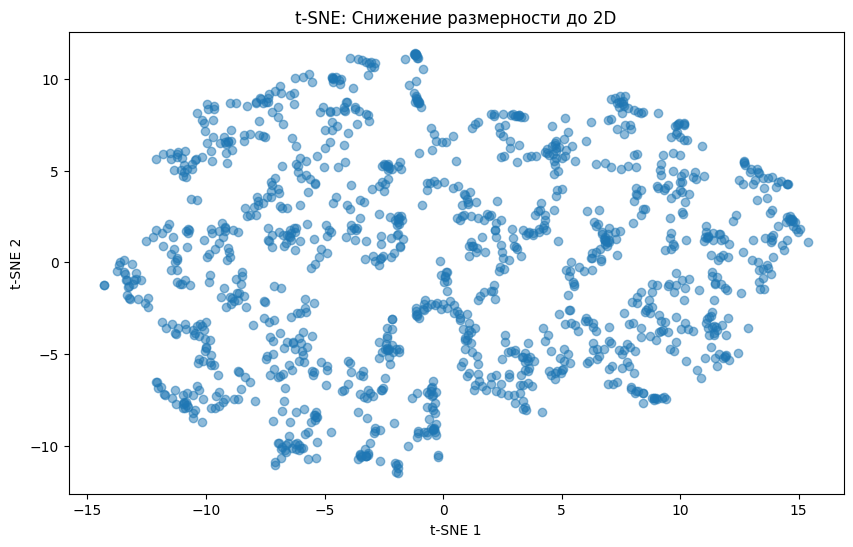

In [9]:
# Применение t-SNE для визуализации структуры локальных соседей
tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Визуализация результата t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5)
plt.title("t-SNE: Снижение размерности до 2D")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

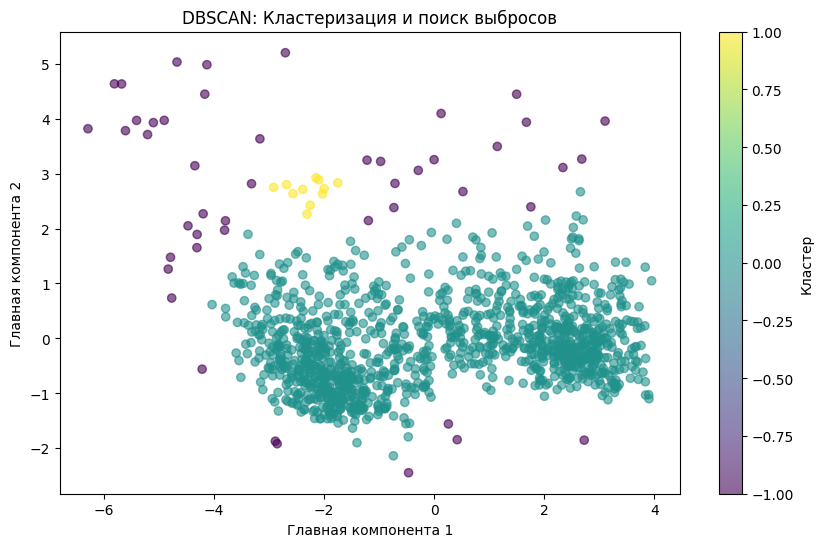

In [8]:
# Применение DBSCAN для кластеризации и поиска выбросов
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Визуализация результата DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap="viridis", alpha=0.6)
plt.title("DBSCAN: Кластеризация и поиск выбросов")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.colorbar(label="Кластер")
plt.show()